# Carregando Corpus

In [15]:
import pandas as pd
import review_lenght_features as rlf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_dev_filmes = pd.read_pickle('/home/rogerio/workspace/Corpus Gigante/corpus_csvs_pickles/corpus_splited/dev_filmes.pkl')
df_dev_apps = pd.read_pickle('/home/rogerio/workspace/Corpus Gigante/corpus_csvs_pickles/corpus_splited/dev_apps.pkl')
df_dev_filmes.head()

,domain,object,author,text,likes,unlikes,stars,date,collect_date,replies,favorite,want_see,recommend,see,internal_id,helpfulness
0,movies,eu-e-orson-welles-t14094,26446,"coitado do orson welles, os fãns do zac efron ...",1,0,0,8 anos atrás,17-04-2019 01:48,0,0,0,,0,663107,1.0
1,movies,hope-t99814,10803,"Acabei de ver esse filme...Estou destruída, ch...",6,0,5,8 meses atrás,20-04-2019 02:22,0,0,0,,1,799405,1.0
2,movies,no-limite-do-amanha-t48262,10184,Gostei demais! Me surpreendi pelo quanto esse ...,2,0,4,4 anos atrás,20-04-2019 07:59,0,1,0,,1,1072629,1.0
3,movies,a-incrivel-historia-de-adaline-t43781,30403,Legalzin.Seria mais legal se o final não fosse...,11,0,0,3 anos atrás,20-04-2019 02:54,0,0,0,,1,99479,1.0
4,movies,touro-indomavel-t1949,575,"Pela enésima vez, obrigado cinemark!",3,0,4,4 anos atrás,20-04-2019 14:17,0,1,0,,1,1680056,1.0


In [9]:
features = []

for index, row in df_dev_apps.iterrows():
    num_sents = rlf.get_num_sents(row['text'])
    num_words = rlf.get_num_words(row['text'])
    avg_sent_len = rlf.get_avg_sent_len(row['text'])
    stars = row['stars']
    helpfulness = row['helpfulness']
    features.append([num_sents, num_words, avg_sent_len, stars, helpfulness])

df_res_apps = pd.DataFrame(features, columns=['sents','words','avg_sent_len','stars','helpfulness'])

features = []
for index, row in df_dev_filmes.iterrows():
    num_sents = rlf.get_num_sents(row['text'])
    num_words = rlf.get_num_words(row['text'])
    avg_sent_len = rlf.get_avg_sent_len(row['text'])
    stars = row['stars']
    helpfulness = row['helpfulness']
    features.append([num_sents, num_words, avg_sent_len, stars, helpfulness])
    
df_res_filmes = pd.DataFrame(features, columns=['sents','words','avg_sent_len','stars','helpfulness'])

# Quantidade de Palavras

## Reviews Úteis

Text(0, 0.5, 'Valores de Palavras')

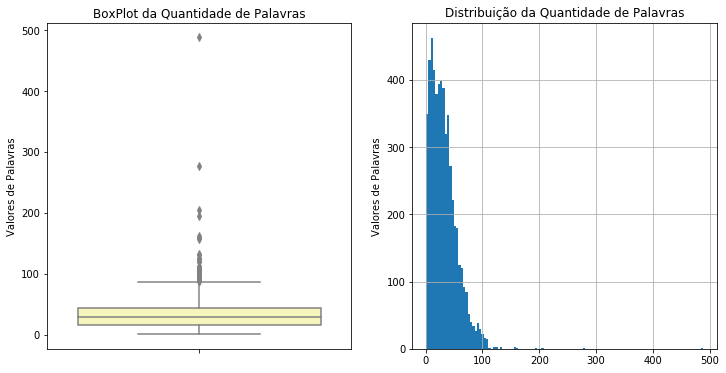

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='words',data=df_res_apps[df_res_apps['helpfulness'] == 1.0], orient='v', color='#ffffb2')
fig.set_title('BoxPlot da Quantidade de Palavras')
fig.set_ylabel('Valores de Palavras')

plt.subplot(1,2,2)
fig = df_res_apps[df_res_apps['helpfulness'] == 1.0].words.hist(bins=120)
fig.set_title('Distribuição da Quantidade de Palavras')
fig.set_ylabel('Valores de Palavras')

## Reviews não úteis

Text(0, 0.5, 'Valores de Palavras')

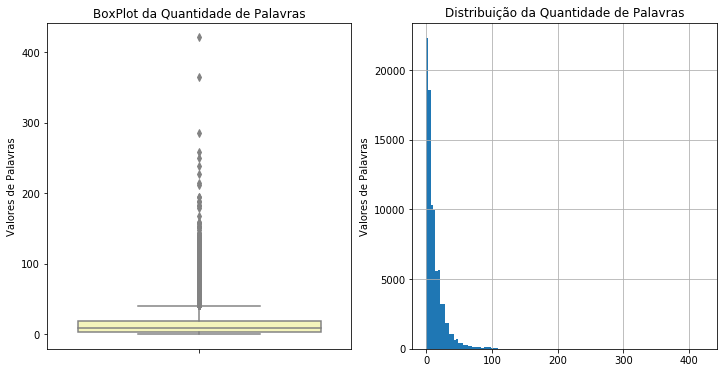

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='words',data=df_res_apps[df_res_apps['helpfulness'] == 0.0], orient='v', color='#ffffb2')
fig.set_title('BoxPlot da Quantidade de Palavras')
fig.set_ylabel('Valores de Palavras')


plt.subplot(1,2,2)
fig = df_res_apps[df_res_apps['helpfulness'] == 0.0].words.hist(bins=120)
fig.set_title('Distribuição da Quantidade de Palavras')
fig.set_ylabel('Valores de Palavras')

# Quantidade de Sentenças

## Reviews Úteis

Text(0, 0.5, 'Valores de Sentenças')

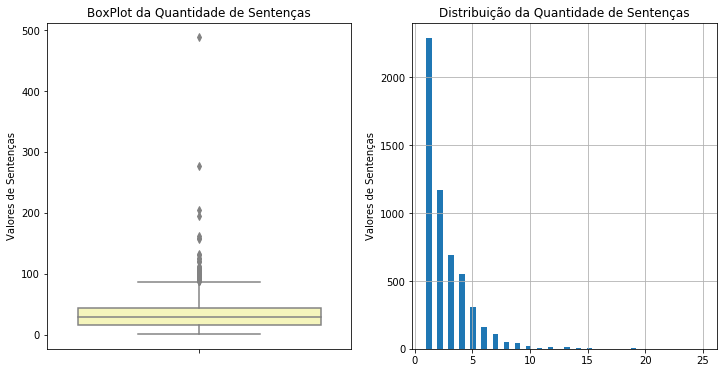

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='words',data=df_res_apps[df_res_apps['helpfulness'] == 1.0], orient='v', color='#ffffb2')
fig.set_title('BoxPlot da Quantidade de Sentenças')
fig.set_ylabel('Valores de Sentenças')


plt.subplot(1,2,2)
fig = df_res_apps[df_res_apps['helpfulness'] == 1.0].sents.hist(bins=50)
fig.set_title('Distribuição da Quantidade de Sentenças')
fig.set_ylabel('Valores de Sentenças')

## Reviews não úteis

Text(0, 0.5, 'Valores de Sentenças')

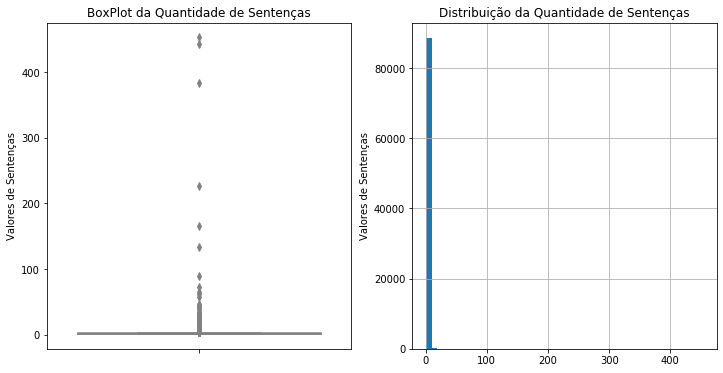

In [48]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='sents',data=df_res_apps[df_res_apps['helpfulness'] == 0.0], orient='v', color='#ffffb2')
fig.set_title('BoxPlot da Quantidade de Sentenças')
fig.set_ylabel('Valores de Sentenças')

plt.subplot(1,2,2)
fig = df_res_apps[df_res_apps['helpfulness'] == 0.0].sents.hist(bins=50)
fig.set_title('Distribuição da Quantidade de Sentenças')
fig.set_ylabel('Valores de Sentenças')

# Média do tamanho das sentenças

## Reviews Úteis

Text(0, 0.5, 'Valores de Média de Sentenças')

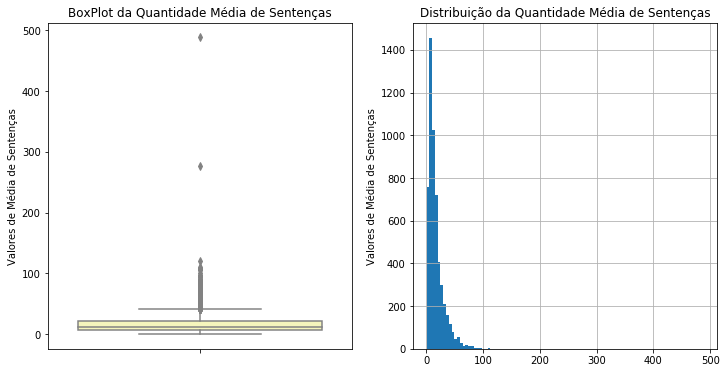

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='avg_sent_len',data=df_res_apps[df_res_apps['helpfulness'] == 1.0], orient='v', color='#ffffb2')
fig.set_title('BoxPlot da Quantidade Média de Sentenças')
fig.set_ylabel('Valores de Média de Sentenças')

plt.subplot(1,2,2)
fig = df_res_apps[df_res_apps['helpfulness'] == 1.0].avg_sent_len.hist(bins=100)
fig.set_title('Distribuição da Quantidade Média de Sentenças')
fig.set_ylabel('Valores de Média de Sentenças')

## Reviews não úteis

Text(0, 0.5, 'Valores de Média de Sentenças')

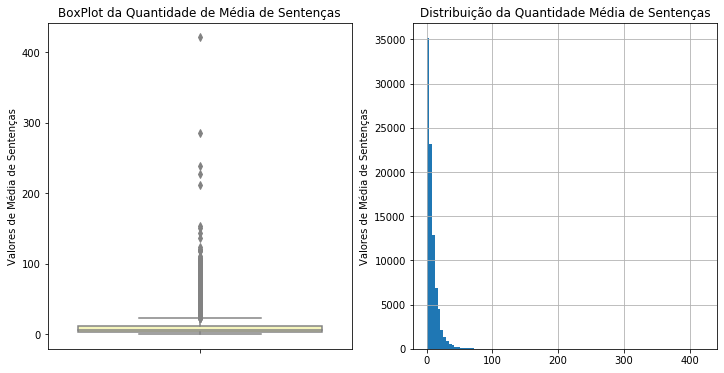

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='avg_sent_len',data=df_res_apps[df_res_apps['helpfulness'] == 0.0], orient='v', color='#ffffb2')
fig.set_title('BoxPlot da Quantidade de Média de Sentenças')
fig.set_ylabel('Valores de Média de Sentenças')

plt.subplot(1,2,2)
fig = df_res_apps[df_res_apps['helpfulness'] == 0.0].avg_sent_len.hist(bins=100)
fig.set_title('Distribuição da Quantidade Média de Sentenças')
fig.set_ylabel('Valores de Média de Sentenças')

# Quantidade de Estrelas

## Reviews Úteis

Text(0, 0.5, 'Valores de Estrelas')

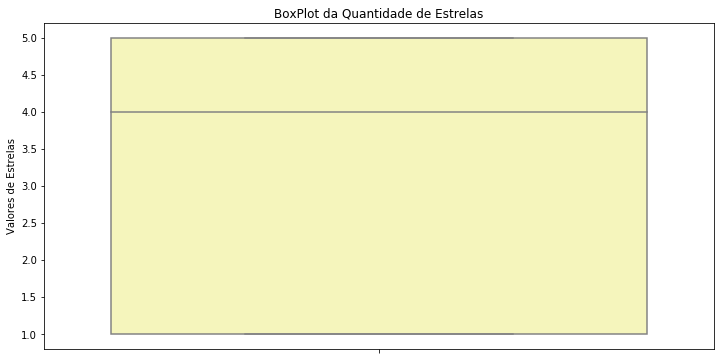

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='stars',data=df_res_apps[df_res_apps['helpfulness'] == 1.0], orient='v', color='#ffffb2')
fig.set_title('BoxPlot da Quantidade de Estrelas')
fig.set_ylabel('Valores de Estrelas')

plt.subplot(1,2,2)
fig = df_res_apps[df_res_apps['helpfulness'] == 1.0].stars.hist(bins=100)
fig.set_title('Distribuição da Quantidade de Estrelas')
fig.set_ylabel('Valores de Estrelas')

## Reviews não úteis

Text(0, 0.5, 'Valores de Estrelas')

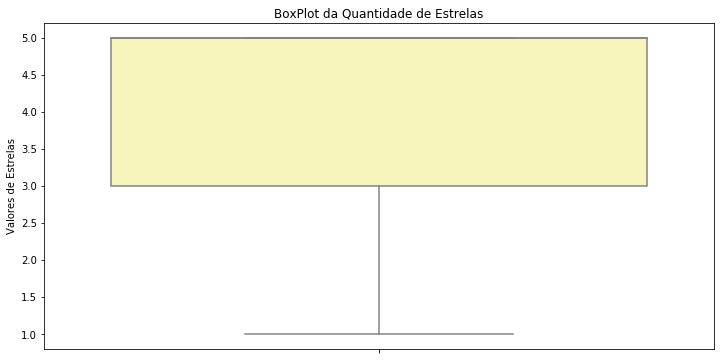

In [29]:
plt.figure(figsize=(12,6))
fig = sns.boxplot(x='stars',data=df_res_apps[df_res_apps['helpfulness'] == 0.0], orient='v', color='#ffffb2')
fig.set_title('BoxPlot da Quantidade de Estrelas')
fig.set_ylabel('Valores de Estrelas')